# Basic Use
This notebook explains the basic use of `detl` and describes the necessary requirements.

In [1]:
import pathlib
import matplotlib.pyplot as plt
import ipywidgets

import detl

## Parsing and Accessing the Raw Data
`detl` reads the CSV export from the DASWARE.
It can work with files from the DASWARE v4 or v5.

The resulting object is of the type `DWData` and in the next code block just called `ddata`.
It inherits from a standard Python dictionary and uses the vessel number (here 1-4) as the key. 
Alternatively, instead of using pathlib.Path(), a filepath can be given as well (as a rawstring).

In [2]:
ddata = detl.parse(
    pathlib.Path('..', 'tests', 'testfiles', 'v4_NT-WMB-2.Control.csv')
)
# display what the  `ddata` object looks like
ddata

{1: <detl.core.ReactorData at 0x1d1f29421c8>,
 2: <detl.core.ReactorData at 0x1d1f3eccf88>,
 3: <detl.core.ReactorData at 0x1d1f3eccd08>,
 4: <detl.core.ReactorData at 0x1d1f3ee1408>}

The `ddata` (`DWData`) object hosts information about the experiment that is not specific to a single reactor vessel:

In [3]:
print(ddata.version)

ddata.units

DASwareVersion.V5


,Identifier,Name,Comment,Reactor
0,Unit 1,NaN,"DASGIP GPI-100 vessel OD110xH300mm, flat botto...",SR1500ODLS
1,Unit 2,NaN,"DASGIP GPI-100 vessel OD110xH300mm, flat botto...",SR1500ODLS
2,Unit 3,NaN,"DASGIP GPI-100 vessel OD110xH300mm, flat botto...",SR1500ODLS
3,Unit 4,NaN,"DASGIP GPI-100 vessel OD110xH300mm, flat botto...",SR1500ODLS


Data about individual reactors can be accessed by retrieving them from the `ddata` dict.
As with all Python objects, the built-in `help` function prints the available attributes, methods and their docstrings:

In [4]:
help(ddata[1])

Help on ReactorData in module detl.core object:

class ReactorData(builtins.object)
 |  ReactorData(id: int)
 |  
 |  Data structure containing data from one reactor.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, id: int)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  get_closest_data(self, points: <built-in function array>, reference: str = 'process_time') -> pandas.core.frame.DataFrame
 |      Returns a subset of the reactor data at points closest to the given ones.
 |      
 |      Args:
 |          points (numpy.array): the data from readings closest to these points will be returned
 |          reference (str): name of the column to look for points
 |      
 |      Returns:
 |          filtered_data: DataFrame containing data closest to the given points
 |      
 |      Raises:
 |          KeyError: when the reference column is not in the DataFrame
 |  
 |  ----------------------------------------------------------------------
 |  Readonly 

The `ReactorData.dataframe` is a `pandas.DataFrame` with all the on-line measurements:

In [5]:
ddata[1].dataframe.head()

,timestamp,duration,process_time,volume_pv,temperature_sp,temperature_pv,temperature_out,stirrer_speed_sp,stirrer_speed_pv,stirrer_torque_pv,...,loop_b_sp,loop_b_pv,loop_b_out,loop_c_sp,loop_c_pv,loop_c_out,loop_d_sp,loop_d_pv,loop_d_out,internal_a_start_oszillation
0,2022-03-30 15:44:03+00:00,0.000000,NaN,1000.0,37.0,0.000,0.0,0.0,NaN,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
1,2022-03-30 15:44:13+00:00,0.002778,NaN,1000.0,37.0,0.000,0.0,0.0,0.000,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
2,2022-03-30 15:44:23+00:00,0.005620,NaN,1000.0,30.0,29.964,0.0,400.0,2.740,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
3,2022-03-30 15:44:33+00:00,0.008402,NaN,1000.0,30.0,29.964,0.0,400.0,0.116,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0
4,2022-03-30 15:44:43+00:00,0.011323,NaN,1000.0,30.0,29.964,0.0,400.0,0.116,0.0,...,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0


It has quite a few columns, all with `lowercase_and_underscore` names such that they can be accessed like `dataframe.process_time` or `dataframe["process_time"]`:

In [6]:
# Here we list all column names
ddata[1].dataframe.columns

Index(['timestamp', 'duration', 'process_time', 'volume_pv', 'temperature_sp',
       'temperature_pv', 'temperature_out', 'stirrer_speed_sp',
       'stirrer_speed_pv', 'stirrer_torque_pv', 'aeration_sp', 'aeration_pv',
       'aeration_air_pv', 'aeration_co2_pv', 'aeration_o2_pv',
       'aeration_n2_pv', 'aeration_x_co2_pv', 'aeration_x_o2_pv', 'ph_sp',
       'ph_pv', 'ph_out', 'do_sp', 'do_pv', 'do_out', 'off-gas_pv',
       'off-gas_x_o2_pv', 'off-gas_x_co2_pv', 'otr_pv', 'vot_pv', 'ctr_pv',
       'vct_pv', 'rq_pv', 'pump_a_rate_sp', 'pump_a_rate_pv',
       'pump_a_volume_pv', 'pump_b_rate_pv', 'pump_b_volume_pv',
       'pump_c_rate_sp', 'pump_c_rate_pv', 'pump_c_volume_pv',
       'pump_d_rate_sp', 'pump_d_rate_pv', 'pump_d_volume_pv', 'absorption_pv',
       'turbidity_pv', 'level_pv', 'loop_a_sp', 'loop_a_pv', 'loop_a_out',
       'loop_b_sp', 'loop_b_pv', 'loop_b_out', 'loop_c_sp', 'loop_c_pv',
       'loop_c_out', 'loop_d_sp', 'loop_d_pv', 'loop_d_out',
       'internal_a

## Visualization
Let's make a simple plot that shows two process variables:

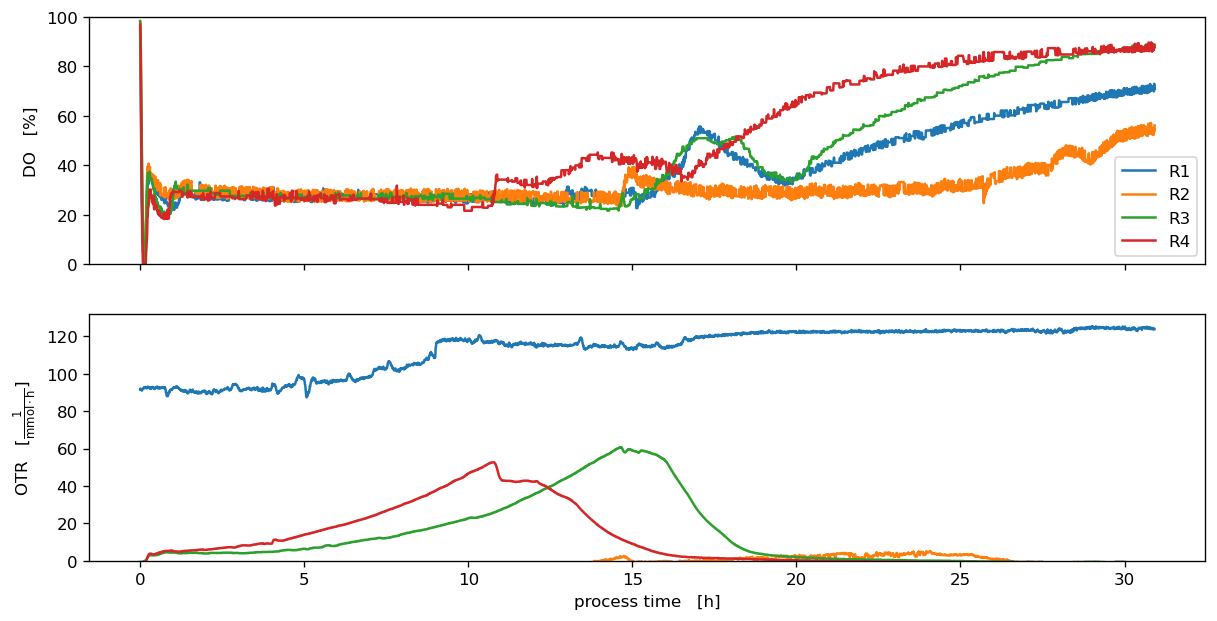

In [7]:
col_top = "do_pv"
col_bottom = "otr_pv"

ylims = {
    "do_pv": (0, 100),
    "otr_pv": (0, None),
}
labels = {
    "do_pv": "DO   [%]",
    "otr_pv": r"OTR   $[\frac{1}{\mathrm{mmol} \cdot \mathrm{h}}]$"
}

# Plotting of stirrer speed, pH, DO, CTR for all reactors
fig, axs = plt.subplots(nrows=2, figsize=(12, 6), sharex=True, dpi=120)
top, bottom = axs

# Iterate through all the reactor vessels:
for rnumber, ritem in ddata.items():
    df = ritem.dataframe

    top.plot(df.process_time, df[col_top], label=f"R{rnumber}")
    bottom.plot(df.process_time, df[col_bottom], label=f"R{rnumber}")

# Set limits and labels
top.set_ylim(
    *ylims.get(col_top, (None, None))
)
bottom.set_ylim(
    *ylims.get(col_bottom, (None, None))
)
top.set_ylabel(
    labels.get(col_top, col_top)
)
bottom.set_ylabel(
    labels.get(col_bottom, col_bottom)
)
bottom.set_xlabel("process time   [h]")

# One legend should be enough
top.legend()

plt.show()

### Interactive Visualization
To explore the data more interactively, we can more or lss copy the code from above into a `plot_reactors` function.
This function can then be passed to `ipywidgets.interact` to make it interactive:

In [8]:
def plot_reactors(col_top="stirrer_speed_pv", col_bottom="stirrer_torque_pv"):
    # Plotting of stirrer speed, pH, DO, CTR for all reactors
    fig, axs = plt.subplots(nrows=2, figsize=(12, 6), sharex=True, dpi=120)
    top, bottom = axs

    # Iterate through all the reactor vessels:
    for rnumber, ritem in ddata.items():
        df = ritem.dataframe

        top.plot(df.process_time, df[col_top], label=f"R{rnumber}")
        bottom.plot(df.process_time, df[col_bottom], label=f"R{rnumber}")

    # Set limits and labels
    top.set_ylim(
        *ylims.get(col_top, (None, None))
    )
    bottom.set_ylim(
        *ylims.get(col_bottom, (None, None))
    )
    top.set_ylabel(
        labels.get(col_top, col_top)
    )
    bottom.set_ylabel(
        labels.get(col_bottom, col_bottom)
    )
    bottom.set_xlabel("process time   [h]")

    top.legend()
    plt.show()
    
ipywidgets.interact(
    plot_reactors,
    col_top=["do_pv", "otr_pv", "stirrer_pv", "ph_pv"],
    col_bottom=ddata[1].dataframe.columns,
);

interactive(children=(Dropdown(description='col_top', options=('do_pv', 'otr_pv', 'stirrer_pv', 'ph_pv'), valu…

In [ ]:
# Date and versions this notebook was last updated with
%load_ext watermark
%watermark -n -u -v -iv -w